# TfidfVectorizer Explanation
Convert a collection of raw documents to a matrix of TF-IDF features

TF-IDF where TF means term frequency, and IDF means Inverse Document frequency.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ['Hello Rukmin Bembde here, I love machine learning','Welcome to the Machine learning hub' ]

In [36]:
vect = TfidfVectorizer()

In [37]:
vect.fit(text)

TfidfVectorizer()

In [38]:
## TF will count the frequency of word in each document. and IDF 
print(vect.idf_)

[1.40546511 1.40546511 1.40546511 1.40546511 1.         1.40546511
 1.         1.40546511 1.40546511 1.40546511 1.40546511]


In [39]:
print(vect.vocabulary_)

{'hello': 1, 'rukmin': 7, 'bembde': 0, 'here': 2, 'love': 5, 'machine': 6, 'learning': 4, 'welcome': 10, 'to': 9, 'the': 8, 'hub': 3}


### A words which is present in all the data, it will have low IDF value. With this unique words will be highlighted using the Max IDF values.

In [40]:
example = text[0]
example

'Hello Rukmin Bembde here, I love machine learning'

In [41]:
example = vect.transform([example])
print(example.toarray())

[[0.4078241  0.4078241  0.4078241  0.         0.29017021 0.4078241
  0.29017021 0.4078241  0.         0.         0.        ]]


### Here, 0 is present in the which indexed word, which is not available in given sentence.

## PassiveAggressiveClassifier

### Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example.

Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.

## Let's start the work

In [42]:
import os
path="C:/Users/Chetan/Desktop/Fake_News_Detection-master"
os.chdir(path)

In [43]:
import pandas as pd

In [44]:
dataframe = pd.read_csv('news.csv')
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [45]:
x = dataframe['text']
y = dataframe['label']

In [46]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [47]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [50]:
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [51]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

* max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
* max_df = 25 means "ignore terms that appear in more than 25 documents".

In [151]:
import ipywidgets as widgets

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

classifier = PassiveAggressiveClassifier(max_iter=50)
drop_down = widgets.Dropdown(options=[LogisticRegression(),PassiveAggressiveClassifier(max_iter=50),RandomForestClassifier(n_estimators=300,n_jobs=3),MultinomialNB(),svm.LinearSVC(),SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3)],
                                description='Choose',
                                disabled=False)

def dropdown_handler(change):
        print(change.new)
        global classifier
        classifier = change.new  
drop_down.observe(dropdown_handler, names='value')
display(drop_down)

Dropdown(description='Choose', options=(LogisticRegression(), PassiveAggressiveClassifier(max_iter=50), Random…

In [146]:

classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [147]:

y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.37%


In [140]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)

[[557  58]
 [ 50 602]]


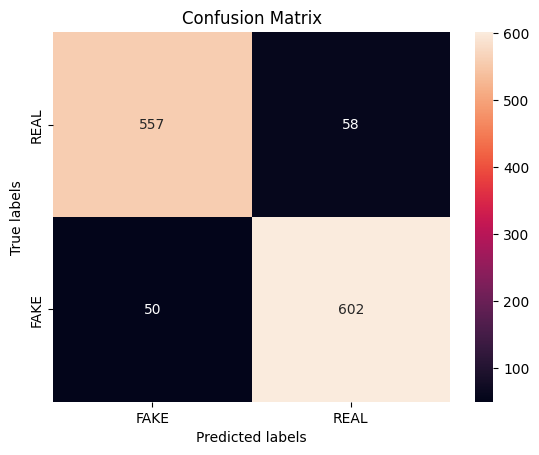

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['FAKE', 'REAL']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

In [121]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [122]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [123]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [144]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [145]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [127]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

In [128]:
fake_news_det1("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [129]:
fake_news_det1("""U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.""")

['REAL']


In [130]:
fake_news_det('''U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.''')

['REAL']
